In [66]:
# Import the libraries
import tweepy
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import nltk

from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

key = ""
endpoint = "https://seba184.cognitiveservices.azure.com/"


def authenticate_client():
    ta_credential = AzureKeyCredential(key)
    text_analytics_client = TextAnalyticsClient(
            endpoint=endpoint, 
            credential=ta_credential)
    return text_analytics_client

client = authenticate_client()

In [21]:
def sentiment_analysis(text):

    response = client.analyze_sentiment(documents = [text])[0]
    return response.sentiment

#sentiment_analysis(client, "I had the best day of my life. I wish you were there with me.")

'positive'

In [15]:
#df = pd.read_csv('Data/mini_twitter.csv')
missing_values = ['','Undefined', 'Undefined->Undefined'] #define values to be identified as NA in the datasets 

df = pd.read_csv('Data/twitter_model.csv', keep_default_na=False, na_values=missing_values)

In [16]:
# Create a function to clean the tweets
def cleanTxt(text):
 text = text.lower()
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 text = re.sub('&amp;', '', text) #remove ampersand
 text = re.sub('\n',' ', text) #remove breakline
 text = re.sub("[^\w]", " ",  text) #remove all distinct to word
 text = re.sub('å', '', text)
 text = re.sub('ä', '', text)
 text = re.sub('ā', '', text)


 text = re.sub(' +', ' ', text) #remove multiple spaces
 
 # clean emoticons
 return text
    

In [17]:
# Clean the tweets
df['text_clean'] = df['text'].apply(cleanTxt)

In [22]:
# Sentiment Analysis
df['Sentiment'] = df['text_clean'].apply(sentiment_analysis)

In [23]:
# Save results to CSV 
df.to_csv('Data/twitter_azure.csv')

## Results

In [26]:
# Read the data 
r = pd.read_csv('Data/twitter_azure.csv')
r.head()

,Unnamed: 0,ID_SALES,text,text_clean,Sentiment
0,0,HD1927A,"Lastly, for a company that's trying to put th...",lastly for a company that s trying to put the...,positive
1,1,ST4244A,what about for us that cant get to the states...,what about for us that cant get to the states...,neutral
2,2,HD108A,an already pleasant flight from London to Cha...,an already pleasant flight from london to cha...,positive
3,3,HD4335A,She could even see that I had tried to make t...,she could even see that i had tried to make t...,neutral
4,4,HN416A,but seriously if my cats dead I'm going to be...,but seriously if my cats dead i m going to be...,negative


In [40]:
#pd.pivot_table(r, index=['ID_SALES'], columns=['Sentiment'], aggfunc=len, fill_value=0)
final = pd.pivot_table(r,index=["ID_SALES"],columns=["Sentiment"],aggfunc='size',fill_value=0)
final


Sentiment,negative,neutral,positive
ID_SALES,,,
CC1387A,1,0,2
CC139A,1,1,1
CC1701A,0,0,3
CC1773A,0,0,3
CC1830A,2,1,0
...,...,...,...
ST60A,3,0,0
ST809A,0,3,0
ST925A,3,0,0


In [65]:
#save pivot table
final.to_csv('Data/sentiment_analysis.csv')

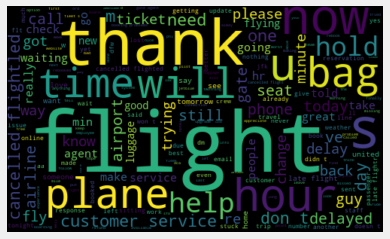

In [63]:
# word cloud visualization
df.head()
allWords = ' '.join([twts for twts in df['text_clean']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [46]:
def travel_type(text):
    last = text[-1]
    return last

r['type'] = r['ID_SALES'].apply(travel_type)
r.head()

,Unnamed: 0,ID_SALES,text,text_clean,Sentiment,type
0,0,HD1927A,"Lastly, for a company that's trying to put th...",lastly for a company that s trying to put the...,positive,A
1,1,ST4244A,what about for us that cant get to the states...,what about for us that cant get to the states...,neutral,A
2,2,HD108A,an already pleasant flight from London to Cha...,an already pleasant flight from london to cha...,positive,A
3,3,HD4335A,She could even see that I had tried to make t...,she could even see that i had tried to make t...,neutral,A
4,4,HN416A,but seriously if my cats dead I'm going to be...,but seriously if my cats dead i m going to be...,negative,A


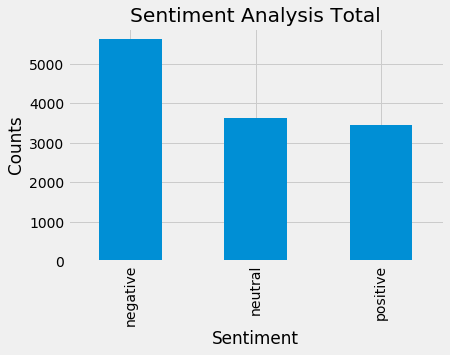

In [47]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis Total')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
r['Sentiment'].value_counts().plot(kind = 'bar')
plt.show()

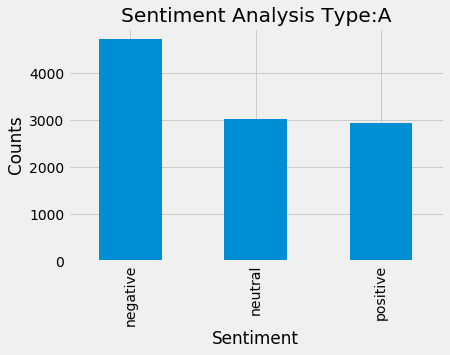

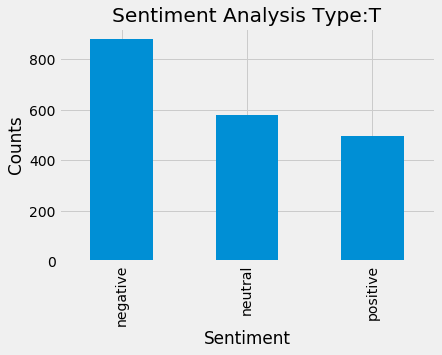

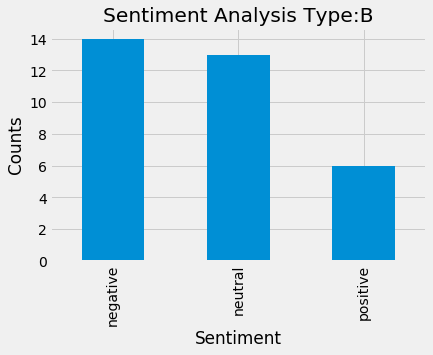

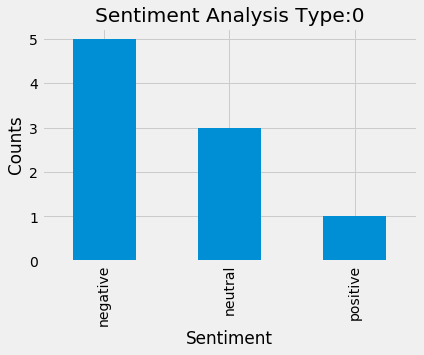

In [64]:
types = r.type.unique()
for t in types:
    plt.title('Sentiment Analysis Type:'+t)
    plt.xlabel('Sentiment')
    plt.ylabel('Counts')
    r[r.type == t]['Sentiment'].value_counts().plot(kind = 'bar')
    plt.show()